In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')


In [15]:
#load and preprocess the data 
# Load the data
data = pd.read_csv('cakes_actual_girja_8_to_8.csv')

# Filter data for cakes (assuming item_name for cakes is 'cake')
cakes_data = data[data['item_name'] == 'All Chocolate Dreamcake -2.5 LBS']

# Convert 'Date' column to datetime
cakes_data['Date'] = pd.to_datetime(cakes_data['Date'])

# Filter data for the last 6 months
start_date = '2023-10-07'
end_date = '2024-05-07'
filtered_data = cakes_data[(cakes_data['Date'] >= start_date) & (cakes_data['Date'] <= end_date)]

# Aggregate data by date
daily_sales = filtered_data.groupby('Date').agg({'Out Qty': 'sum'}).reset_index()
daily_sales.set_index('Date', inplace=True)



In [3]:
#Data Augmentation -> adding noise
def augment_data(data, num_augmentations=5, noise_level=0.01):
    augmented_data = [data]
    for _ in range(num_augmentations):
        noise = np.random.normal(loc=0, scale=noise_level, size=len(data))
        new_data = data + noise
        augmented_data.append(new_data)
    return augmented_data

# Apply data augmentation
augmented_sales = augment_data(daily_sales['Out Qty'])


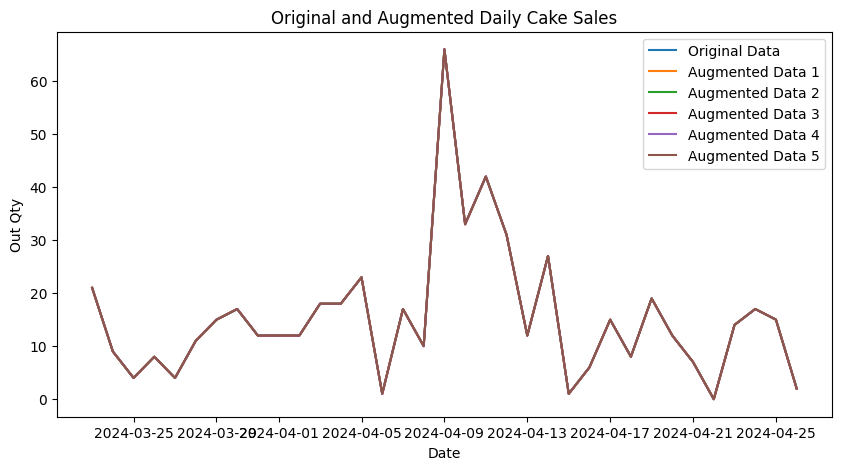

In [4]:
#Visualize orignal and augmented data
plt.figure(figsize=(10, 5))
for i, series in enumerate(augmented_sales):
    plt.plot(series, label=f'Augmented Data {i}' if i > 0 else 'Original Data')
plt.title('Original and Augmented Daily Cake Sales')
plt.xlabel('Date')
plt.ylabel('Out Qty')
plt.legend()
plt.show()


In [5]:
#Check for stationary and difference the series
# Function to check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))

# Differencing each augmented series if necessary
augmented_sales_diff = []
for series in augmented_sales:
    adf_test(series)
    series_diff = series.diff().dropna()
    adf_test(series_diff)
    augmented_sales_diff.append(series_diff)


ADF Statistic: -2.329588216808008
p-value: 0.16260265312996025
Critical Value 1%: -3.6461350877925254
Critical Value 5%: -2.954126991123355
Critical Value 10%: -2.6159676124885216
ADF Statistic: -9.984634417236391
p-value: 2.0710172526638176e-17
Critical Value 1%: -3.6461350877925254
Critical Value 5%: -2.954126991123355
Critical Value 10%: -2.6159676124885216
ADF Statistic: -2.329726040768277
p-value: 0.1625598586287355
Critical Value 1%: -3.6461350877925254
Critical Value 5%: -2.954126991123355
Critical Value 10%: -2.6159676124885216
ADF Statistic: -9.981809232795285
p-value: 2.105062495676394e-17
Critical Value 1%: -3.6461350877925254
Critical Value 5%: -2.954126991123355
Critical Value 10%: -2.6159676124885216
ADF Statistic: -2.3292145697422266
p-value: 0.16271870964758317
Critical Value 1%: -3.6461350877925254
Critical Value 5%: -2.954126991123355
Critical Value 10%: -2.6159676124885216
ADF Statistic: -9.983117550030396
p-value: 2.0892270138398266e-17
Critical Value 1%: -3.6461350

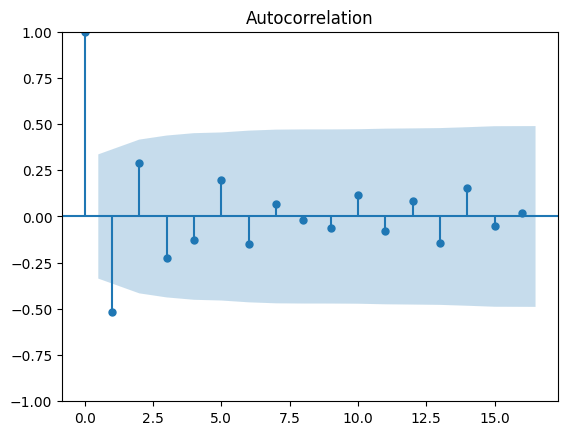

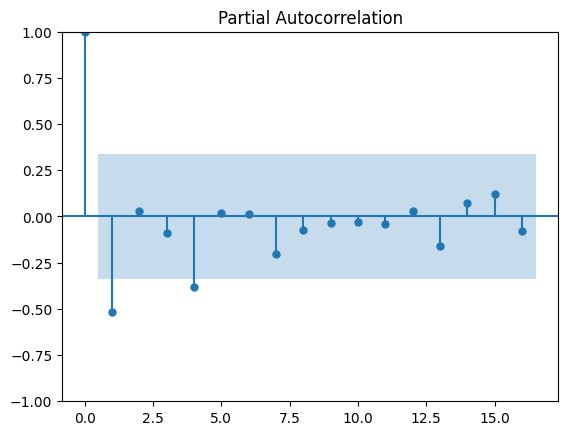

c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No f

                               SARIMAX Results                                
Dep. Variable:                Out Qty   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -133.558
Date:                Thu, 23 May 2024   AIC                            273.115
Time:                        13:06:04   BIC                            277.605
Sample:                    03-24-2024   HQIC                           274.626
                         - 04-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5066      0.211     -2.397      0.017      -0.921      -0.092
ma.L1         -0.9995     26.005     -0.038      0.969     -51.969      49.970
sigma2       166.8261   4316.134      0.039      0.9

c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\AbdulRafay\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No f

In [6]:
#Fit the ARIMA model for each augmented series
# Plot ACF and PACF for the first series to determine p and q
plot_acf(augmented_sales_diff[0])
plot_pacf(augmented_sales_diff[0])
plt.show()

# Fit ARIMA model to each augmented series (assuming p=1, d=1, q=1)
fitted_models = []
for series_diff in augmented_sales_diff:
    model = ARIMA(series_diff, order=(1, 1, 1))
    fitted_model = model.fit()
    fitted_models.append(fitted_model)
    print(fitted_model.summary())


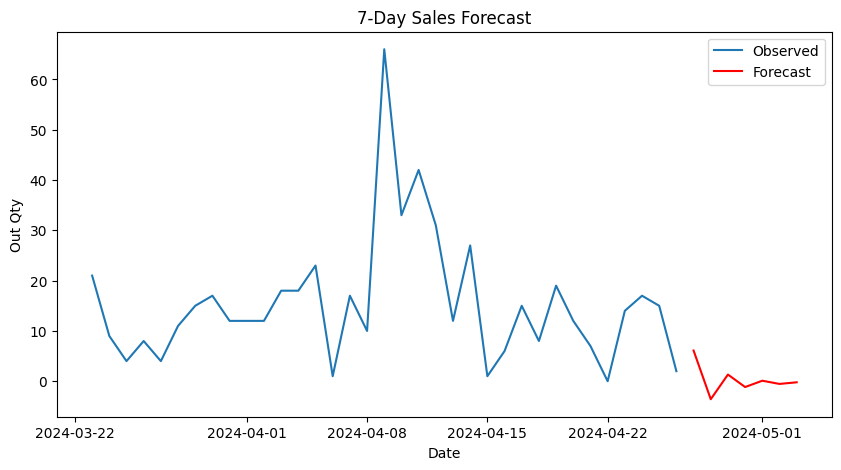

Forecasted sales for the next 7 days:
2024-04-27    6.107002
2024-04-28   -3.573073
2024-04-29    1.331024
2024-04-30   -1.153479
2024-05-01    0.105215
2024-05-02   -0.532462
2024-05-03   -0.209404
dtype: float64


In [7]:
#make prediction and aggregate results
forecast_steps = 7
forecasts = []

for fitted_model in fitted_models:
    forecast = fitted_model.forecast(steps=forecast_steps)
    forecasts.append(forecast)

# Average the forecasts
forecast_averages = np.mean(forecasts, axis=0)
forecast_dates = [daily_sales.index[-1] + timedelta(days=x) for x in range(1, forecast_steps + 1)]
forecast_series = pd.Series(forecast_averages, index=forecast_dates)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('7-Day Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Out Qty')
plt.legend()
plt.show()

# Output the forecasted values
print("Forecasted sales for the next 7 days:")
print(forecast_series)


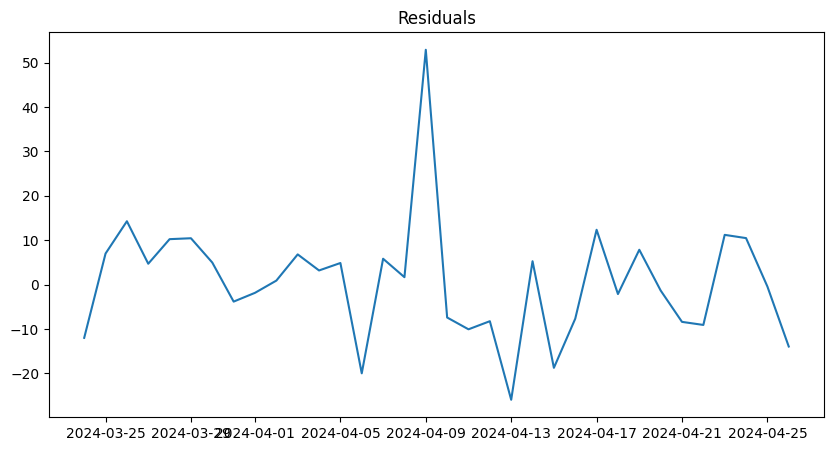

In [12]:
residuals = fitted_models[0].resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals')
plt.show()
